<a href="https://colab.research.google.com/github/Paranjay33/Diabetes-Prediction-using-ML-Techniquess/blob/main/Copy_of_aimlprojectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Initial Processing
!pip install streamlit
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv('/content/sample_data/diabetes_dataset.csv')





In [ ]:

# Check for missing values
print("Missing Values:")
print(data.isnull().sum())





Missing Values:
Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64


In [ ]:

# Create Outcome column based on glucose and HbA1c thresholds
# Diabetes: Fasting_Blood_Glucose >= 126 mg/dL or HbA1c >= 6.5%
data['Outcome'] = ((data['Fasting_Blood_Glucose'] >= 126) | (data['HbA1c'] >= 6.5)).astype(int)





In [ ]:


# Display first few rows and Outcome distribution
print("\nFirst 5 rows after adding Outcome:")
print(data.head())
print("\nOutcome Distribution:")
print(data['Outcome'].value_counts(normalize=True))





First 5 rows after adding Outcome:
   Unnamed: 0  Age     Sex Ethnicity   BMI  Waist_Circumference  \
0           0   58  Female     White  35.8                 83.4   
1           1   48    Male     Asian  24.1                 71.4   
2           2   34  Female     Black  25.0                113.8   
3           3   62    Male     Asian  32.7                100.4   
4           4   27  Female     Asian  33.5                110.8   

   Fasting_Blood_Glucose  HbA1c  Blood_Pressure_Systolic  \
0                  123.9   10.9                      152   
1                  183.7   12.8                      103   
2                  142.0   14.5                      179   
3                  167.4    8.8                      176   
4                  146.4    7.1                      122   

   Blood_Pressure_Diastolic  ...  Cholesterol_LDL   GGT  Serum_Urate  \
0                       114  ...             99.2  37.5          7.2   
1                        91  ...            146.4  88.5 

In [ ]:

# Part 2: Data Preprocessing

## Numerical and Categorical Columns

# Define numerical and categorical columns
numerical_cols = ['Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'HbA1c',
                 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Total',
                 'Cholesterol_HDL', 'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Dietary_Intake_Calories']
categorical_cols = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption',
                   'Smoking_Status', 'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes']




In [ ]:


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif



In [ ]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', sparse_output=False))]) # Changed sparse=False to sparse_output=False

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:


# Feature selection
selector = SelectKBest(score_func=f_classif, k=15)



In [ ]:



# Apply preprocessing
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_preprocessed = preprocessor.fit_transform(X)




In [ ]:





# Get feature names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
feature_names = numerical_cols + list(cat_feature_names)




In [ ]:






# Apply feature selection
X_selected = selector.fit_transform(X_preprocessed, y)
selected_features = [feature_names[i] for i in selector.get_support(indices=True)]

print("Selected Features:", selected_features)



Selected Features: ['Age', 'BMI', 'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_LDL', 'Dietary_Intake_Calories', 'Sex_Male', 'Ethnicity_White', 'Physical_Activity_Level_Moderate', 'Alcohol_Consumption_Moderate', 'Alcohol_Consumption_nan', 'Smoking_Status_Never', 'Previous_Gestational_Diabetes_1']


In [ ]:

# Part 4: Machine Learning Techniques

## 4.1 Supervised Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt



In [ ]:



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)



In [ ]:


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Dictionary to store metrics
results = []



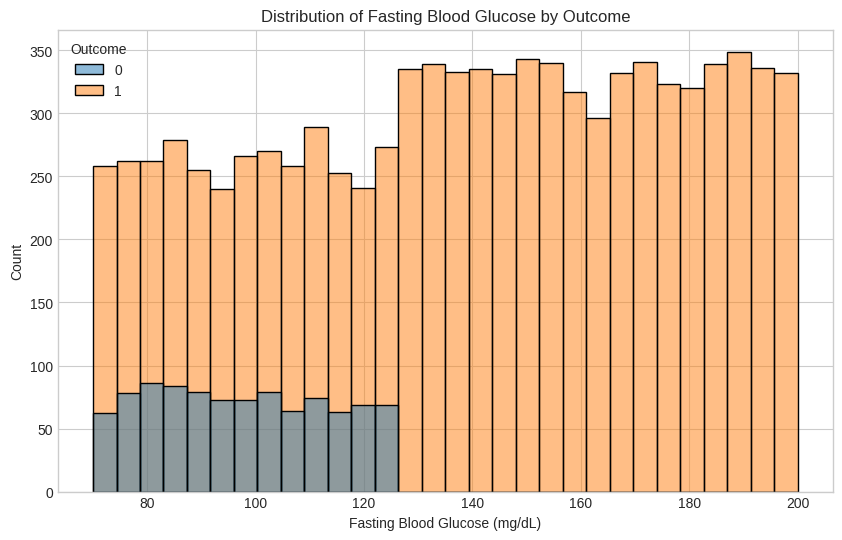

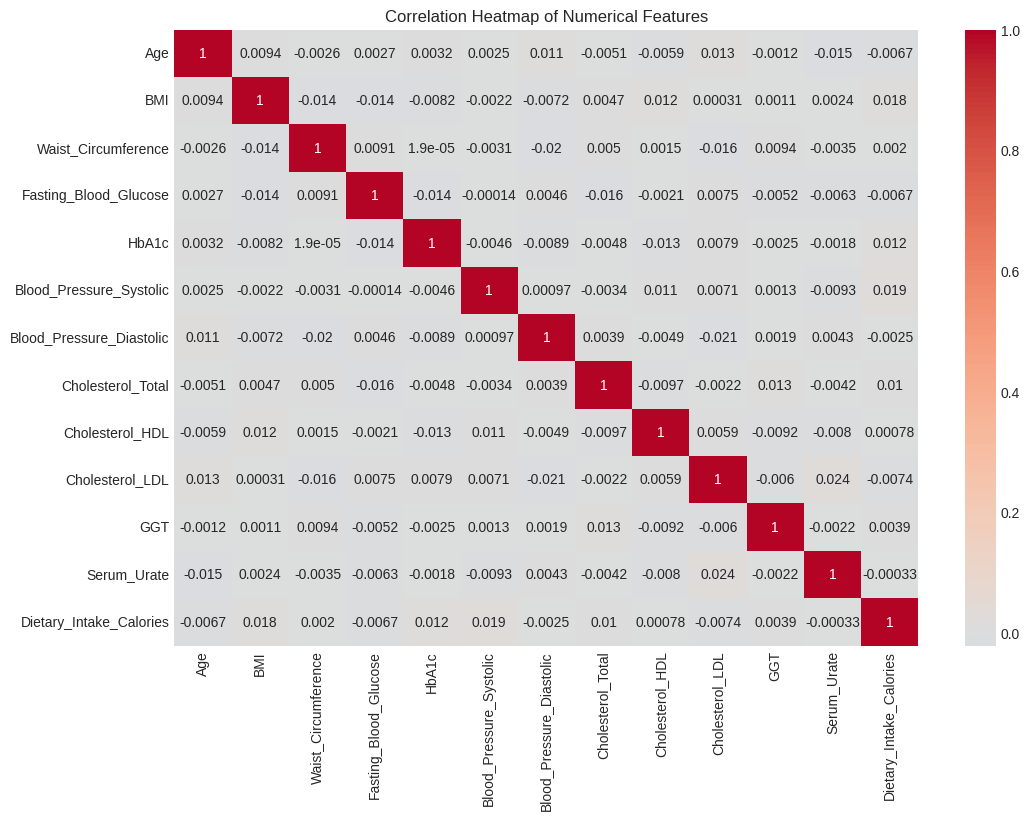

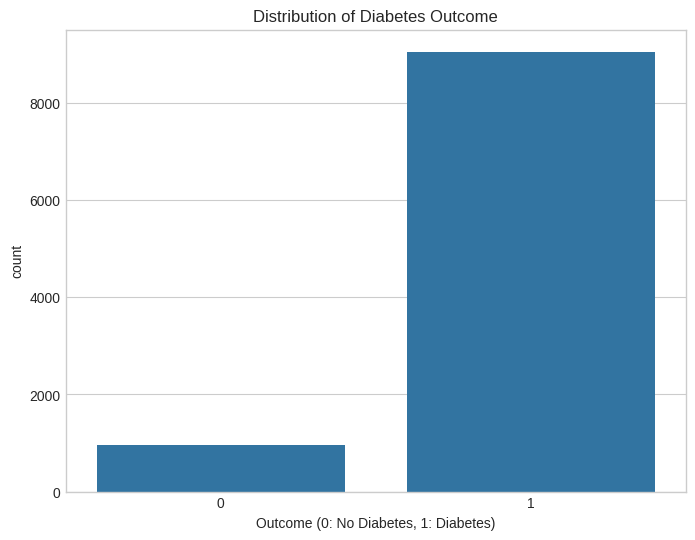

In [ ]:


# Part 3: Exploratory Data Analysis (EDA)


import matplotlib.pyplot as plt
import seaborn as sns

# Set style
# plt.style.use('seaborn') # Removed this line as it causes the error

# Histogram of Glucose Levels
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Fasting_Blood_Glucose', hue='Outcome', bins=30)
plt.title('Distribution of Fasting Blood Glucose by Outcome')
plt.xlabel('Fasting Blood Glucose (mg/dL)')
plt.savefig('glucose_histogram.png')
plt.show()

# Correlation Heatmap (Numerical Columns Only)
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()

# Distribution of Outcome
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.savefig('outcome_distribution.png')
plt.show()


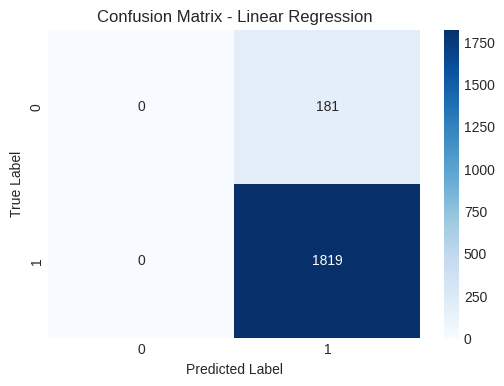

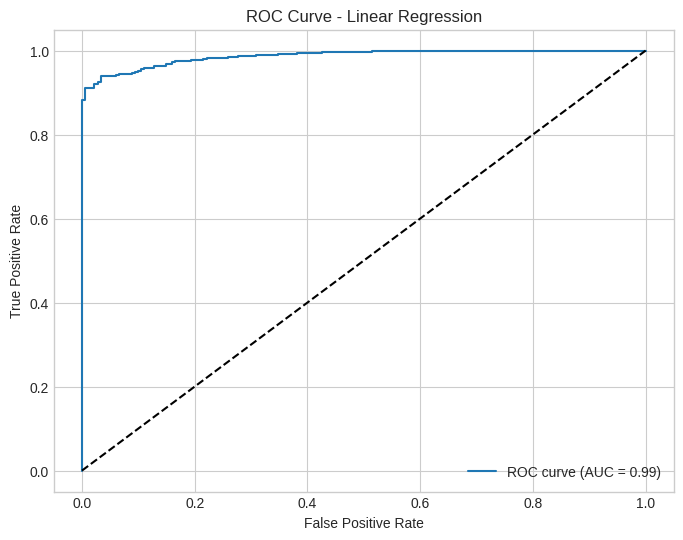

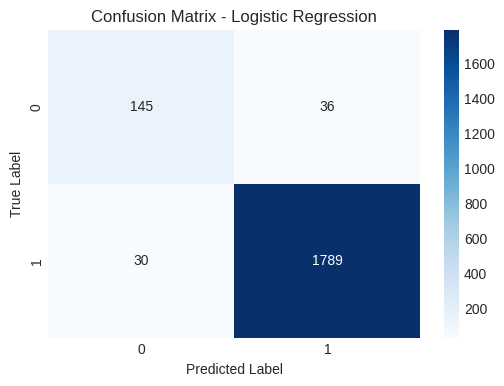

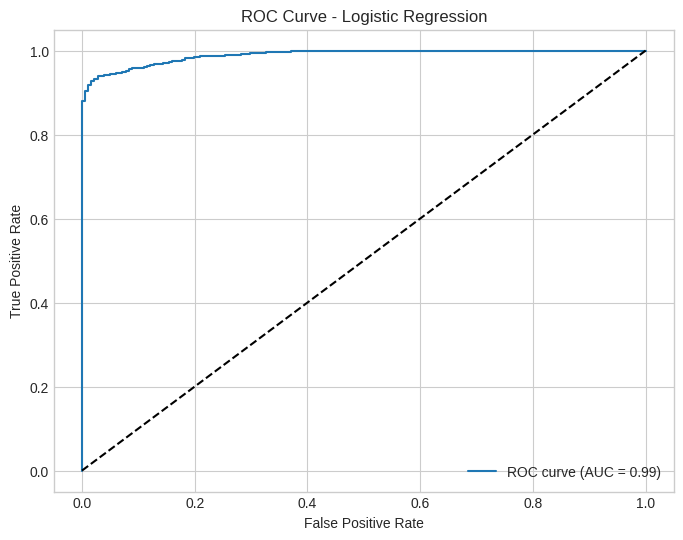

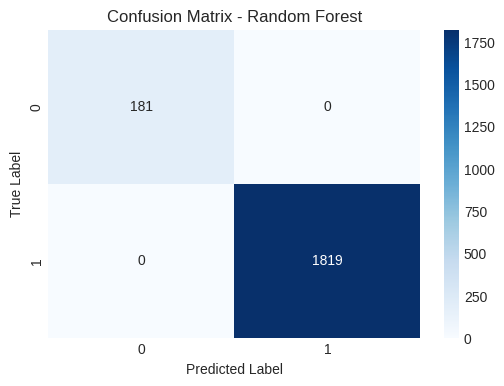

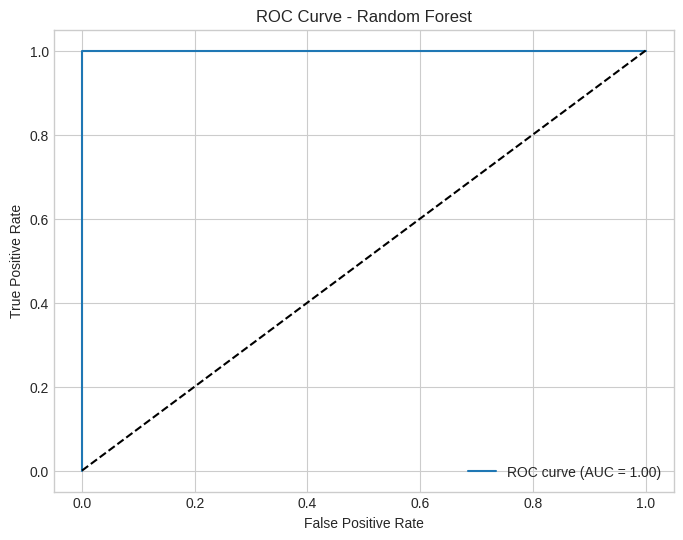

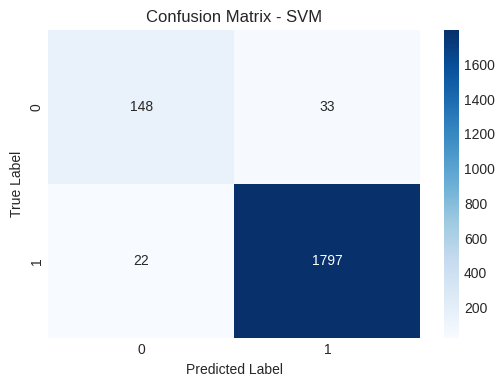

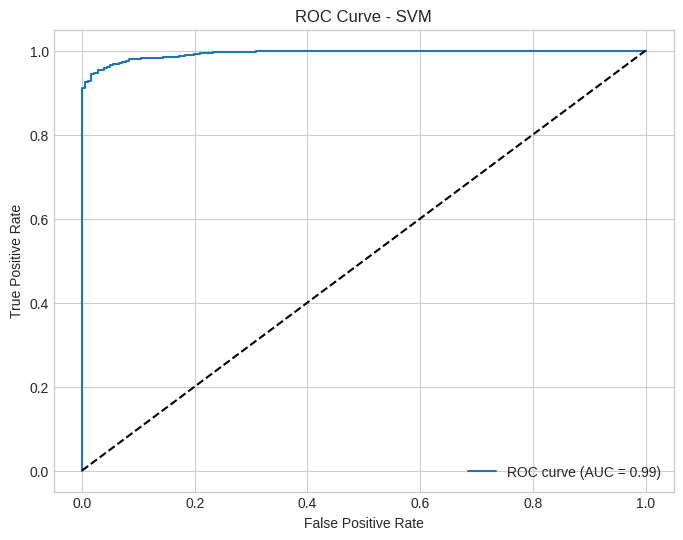

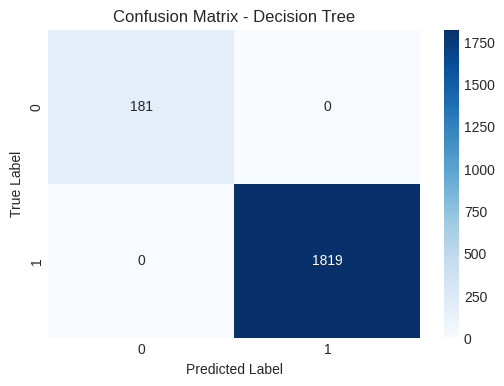

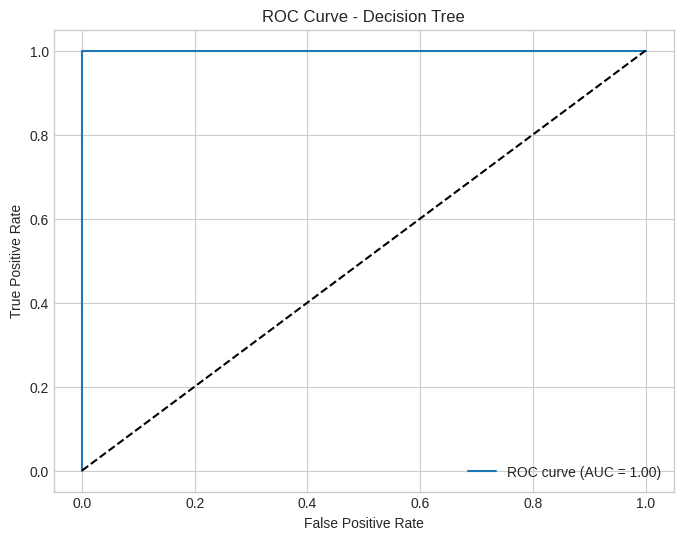

Supervised Learning Results:
                 Model  Accuracy  Precision    Recall  F1-Score
0    Linear Regression    0.9095   0.909500  1.000000  0.952605
1  Logistic Regression    0.9670   0.980274  0.983507  0.981888
2        Random Forest    1.0000   1.000000  1.000000  1.000000
3                  SVM    0.9725   0.981967  0.987905  0.984927
4        Decision Tree    1.0000   1.000000  1.000000  1.000000

Best Model: Random Forest


In [ ]:


# Part 4: Machine Learning Techniques

## 4.1 Supervised Learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Dictionary to store metrics
results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)

    # For Linear Regression, apply threshold of 0.5
    if name == 'Linear Regression':
        y_pred = (model.predict(X_test) >= 0.5).astype(int)
        y_prob = model.predict(X_test)
    else:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'cm_{name.lower().replace(" ", "_")}.png')
    plt.show()

    # ROC Curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig(f'roc_{name.lower().replace(" ", "_")}.png')
        plt.show()

    # Save model for frontend use
    joblib.dump(model, f'{name.lower().replace(" ", "_")}_model.pkl')

# Display results
results_df = pd.DataFrame(results)
print("Supervised Learning Results:")
print(results_df)

# Find best model
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model:", best_model['Model'])


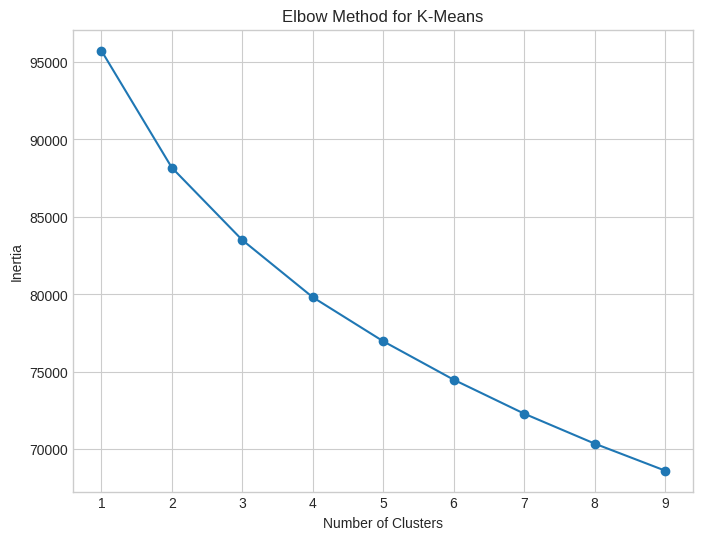


Clustering Evaluation Metrics:
           Model  Silhouette Score  Calinski-Harabasz Index  \
0  K-Means (k=2)          0.077403               856.863554   
1         DBSCAN               NaN                      NaN   

   Davies-Bouldin Index  Homogeneity  Completeness  V-measure  \
0              3.382544     0.229244      0.104065   0.143148   
1                   NaN          NaN           NaN        NaN   

   Adjusted Rand Index  
0             0.040067  
1                  NaN  


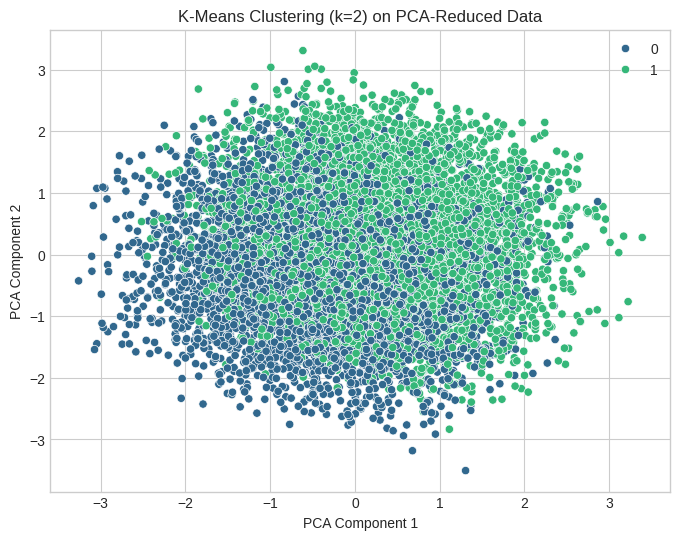

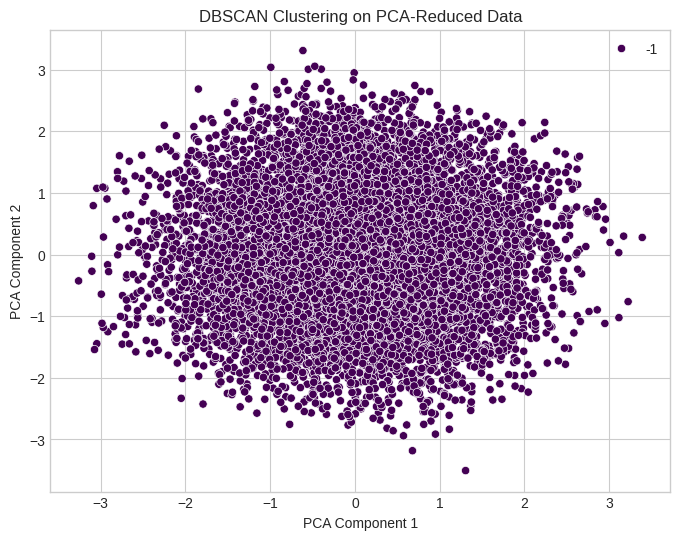

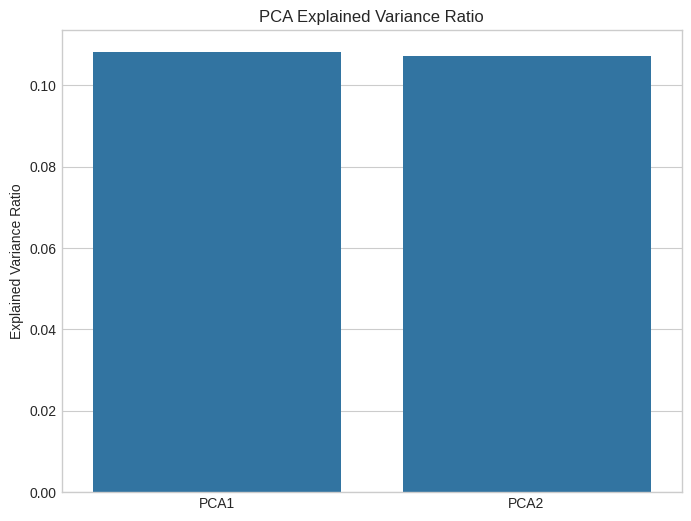


Best Model: K-Means (k=2) with Silhouette Score: 0.0774


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns


# Elbow Method for K-Means
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_selected)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# K-Means with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_selected)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_selected)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Evaluation Metrics
metrics = []
for name, labels in [('K-Means (k=2)', kmeans_labels), ('DBSCAN', dbscan_labels)]:
    if len(np.unique(labels)) > 1:  # Metrics require multiple clusters
        silhouette = silhouette_score(X_selected, labels)
        calinski = calinski_harabasz_score(X_selected, labels)
        davies = davies_bouldin_score(X_selected, labels)
        homogeneity = homogeneity_score(y, labels)
        completeness = completeness_score(y, labels)
        v_measure = v_measure_score(y, labels)
        ari = adjusted_rand_score(y, labels)
    else:
        silhouette = calinski = davies = homogeneity = completeness = v_measure = ari = np.nan

    metrics.append({
        'Model': name,
        'Silhouette Score': silhouette,
        'Calinski-Harabasz Index': calinski,
        'Davies-Bouldin Index': davies,
        'Homogeneity': homogeneity,
        'Completeness': completeness,
        'V-measure': v_measure,
        'Adjusted Rand Index': ari
    })

# Display metrics
print("\nClustering Evaluation Metrics:")
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Visualizations
# K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering (k=2) on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# PCA Explained Variance
plt.figure(figsize=(8, 6))
sns.barplot(x=['PCA1', 'PCA2'], y=pca.explained_variance_ratio_)
plt.title('PCA Explained Variance Ratio')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Best model based on Silhouette Score
best_model = metrics_df.loc[metrics_df['Silhouette Score'].idxmax(), 'Model']
best_silhouette = metrics_df['Silhouette Score'].max()
print(f"\nBest Model: {best_model} with Silhouette Score: {best_silhouette:.4f}")

In [ ]:

!pip install streamlit pyngrok



import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from pyngrok import ngrok # Import ngrok here


preprocessor = joblib.load('preprocessor.pkl')
selector = joblib.load('selector.pkl')
selected_features = joblib.load('selected_features.pkl')
models = {
    'Linear Regression': joblib.load('linear_regression_model.pkl'),
    'Logistic Regression': joblib.load('logistic_regression_model.pkl'),
    'Random Forest': joblib.load('random_forest_model.pkl'),
    'SVM': joblib.load('svm_model.pkl'),
    'Decision Tree': joblib.load('decision_tree_model.pkl')
}
kmeans = joblib.load('kmeans_model.pkl')
pca = joblib.load('pca_model.pkl')

# Streamlit app
st.title("Diabetes Prediction App")
st.write("Enter patient details to predict diabetes risk using machine learning models.")

# Input form
st.header("Patient Data Input")
col1, col2, col3 = st.columns(3)

# Numerical inputs
with col1:
    age = st.number_input("Age", min_value=0, max_value=120, value=30)
    bmi = st.number_input("BMI", min_value=10.0, max_value=60.0, value=25.0)
    waist_circumference = st.number_input("Waist Circumference (cm)", min_value=50.0, max_value=150.0, value=80.0)
    fasting_glucose = st.number_input("Fasting Blood Glucose (mg/dL)", min_value=50.0, max_value=300.0, value=100.0)
    hba1c = st.number_input("HbA1c (%)", min_value=0.0, max_value=20.0, value=5.5)

with col2:
    bp_systolic = st.number_input("Systolic Blood Pressure (mmHg)", min_value=80, max_value=200, value=120)
    bp_diastolic = st.number_input("Diastolic Blood Pressure (mmHg)", min_value=40, max_value=120, value=80)
    cholesterol_total = st.number_input("Total Cholesterol (mg/dL)", min_value=100.0, max_value=400.0, value=200.0)
    cholesterol_hdl = st.number_input("HDL Cholesterol (mg/dL)", min_value=20.0, max_value=100.0, value=50.0)
    cholesterol_ldl = st.number_input("LDL Cholesterol (mg/dL)", min_value=50.0, max_value=300.0, value=100.0)

with col3:
    ggt = st.number_input("GGT (U/L)", min_value=0.0, max_value=200.0, value=30.0)
    serum_urate = st.number_input("Serum Urate (mg/dL)", min_value=0.0, max_value=10.0, value=5.0)
    dietary_calories = st.number_input("Dietary Intake (Calories)", min_value=500, max_value=5000, value=2000)
    family_history = st.selectbox("Family History of Diabetes", [0, 1], format_func=lambda x: "Yes" if x == 1 else "No")
    gestational_diabetes = st.selectbox("Previous Gestational Diabetes", [0, 1], format_func=lambda x: "Yes" if x == 1 else "No")

# Categorical inputs
st.header("Categorical Inputs")
col4, col5, col6 = st.columns(3)
with col4:
    sex = st.selectbox("Sex", ["Male", "Female"])
    ethnicity = st.selectbox("Ethnicity", ["White", "Asian", "Black", "Hispanic"])
with col5:
    physical_activity = st.selectbox("Physical Activity Level", ["Low", "Moderate", "High"])
    alcohol_consumption = st.selectbox("Alcohol Consumption", ["None", "Moderate", "Heavy"])
with col6:
    smoking_status = st.selectbox("Smoking Status", ["Never", "Former", "Current"])

# Create input DataFrame
input_data = pd.DataFrame({
    'Age': [age], 'BMI': [bmi], 'Waist_Circumference': [waist_circumference],
    'Fasting_Blood_Glucose': [fasting_glucose], 'HbA1c': [hba1c],
    'Blood_Pressure_Systolic': [bp_systolic], 'Blood_Pressure_Diastolic': [bp_diastolic],
    'Cholesterol_Total': [cholesterol_total], 'Cholesterol_HDL': [cholesterol_hdl],
    'Cholesterol_LDL': [cholesterol_ldl], 'GGT': [ggt], 'Serum_Urate': [serum_urate],
    'Dietary_Intake_Calories': [dietary_calories], 'Sex': [sex], 'Ethnicity': [ethnicity],
    'Physical_Activity_Level': [physical_activity], 'Alcohol_Consumption': [alcohol_consumption],
    'Smoking_Status': [smoking_status], 'Family_History_of_Diabetes': [family_history],
    'Previous_Gestational_Diabetes': [gestational_diabetes]
})

# Prediction button
if st.button("Predict Diabetes"):
    # Preprocess input
    X_input = preprocessor.transform(input_data)
    X_input_selected = selector.transform(X_input)

    # Supervised predictions
    st.header("Supervised Model Predictions")
    predictions = {}
    probabilities = {}
    for name, model in models.items():
        if name == 'Linear Regression':
            pred = (model.predict(X_input_selected) >= 0.5).astype(int)[0]
            prob = model.predict(X_input_selected)[0]
        else:
            pred = model.predict(X_input_selected)[0]
            prob = model.predict_proba(X_input_selected)[0][1] if hasattr(model, 'predict_proba') else None
        predictions[name] = "Diabetic" if pred == 1 else "Non-Diabetic"
        probabilities[name] = prob

    # Display predictions
    for name, pred in predictions.items():
        prob = probabilities[name]
        st.write(f"**{name}**: {pred}" + (f" (Probability: {prob:.2%})" if prob is not None else ""))

    # Plot prediction probabilities
    prob_df = pd.DataFrame({
        'Model': [name for name, prob in probabilities.items() if prob is not None],
        'Probability': [prob for prob in probabilities.values() if prob is not None]
    })
    if not prob_df.empty:
        fig, ax = plt.subplots()
        sns.barplot(x='Probability', y='Model', data=prob_df)
        plt.title('Prediction Probabilities Across Models')
        st.pyplot(fig)

    # Feature importance for Random Forest
    if 'Random Forest' in models:
        rf_model = models['Random Forest']
        importances = rf_model.feature_importances_
        importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
        importance_df = importance_df.sort_values('Importance', ascending=False)

        fig, ax = plt.subplots()
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title('Random Forest Feature Importance')
        st.pyplot(fig)

    # Unsupervised prediction (K-Means)
    st.header("Unsupervised Model Prediction (K-Means)")
    kmeans_pred = kmeans.predict(X_input_selected)[0]
    st.write(f"K-Means Cluster: {kmeans_pred}")

    # Visualize input in PCA space
    # Ensure kmeans_labels is defined, which should be available if the previous
    # K-Means cell has been executed.
    if 'kmeans_labels' in globals():
        fig, ax = plt.subplots()
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5, label='Data Points')
        plt.scatter(X_pca_input[0, 0], X_pca_input[0, 1], c='red', marker='*', s=200, label='Input')
        plt.title('Input Data in K-Means Clusters (PCA)')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.legend()
        st.pyplot(fig)
    else:
        st.warning("K-Means labels not found. Please run the K-Means clustering cell.")

# For running the Streamlit app in Colab using ngrok, you would typically
# save this code to a file (e.g., app.py) and then run it.
# The following lines are for setting up ngrok and running the app in a
# separate process, which is common for Colab.
# You will need your ngrok auth token.
# try:
#     ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN")  # Replace with your actual token
#     public_url = ngrok.connect(8501)
#     print(f"Streamlit app running at: {public_url}")
#     # You need to save the code above to 'app.py' first.
#     # Then, you would run the following command in a separate cell or process:
#     # !streamlit run app.py --server.port 8501
# except Exception as e:
#     print(f"Error setting up ngrok or running Streamlit: {e}")

2025-06-09 05:13:31.568 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 05:13:31.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 05:13:31.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 05:13:31.573 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 05:13:31.574 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 05:13:31.575 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 05:13:31.576 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 05:13:31.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:

!pip install streamlit==1.38.0 pyngrok pandas numpy scikit-learn matplotlib seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
!nohup streamlit run app.py --server.port 8501 --server.enableCORS true --server.enableXsrfProtection false &

nohup: appending output to 'nohup.out'


In [ ]:
!cat /content/nohup.out

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.18.6:8501



2025-06-09 08:19:25.392 Port 8501 is already in use


2025-06-09 08:19:57.530 Port 8501 is already in use


2025-06-09 08:20:20.176 Port 8501 is already in use


2025-06-09 08:21:53.554 Port 8501 is already in use


2025-06-09 08:22:45.971 Port 8501 is already in use


2025-06-09 08:23:15.505 Port 8501 is already in use


2025-06-09 08:24:58.786 Port 8501 is already in use


2025-06-09 08:27:03.584 Port 8501 is already in use


2025-06-09 08:28:01.378 Port 8501 is already in use


In [ ]:
!streamlit config browser.gatherUsageStats false

Usage: streamlit config [OPTIONS] COMMAND [ARGS]...
Try 'streamlit config --help' for help.

Error: No such command 'browser.gatherUsageStats'.


In [ ]:
!pip install pyngrok --quiet

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2yDdQAHvKTE2fDE5oSABLvdDAVg_6wiTuapVwuEbzG8KMwDhf")

In [ ]:
ngrok.kill()

In [ ]:
public_url = ngrok.connect(8501)
print(f"Streamlit app running at: {public_url}")

Streamlit app running at: NgrokTunnel: "https://ea77-34-23-18-6.ngrok-free.app" -> "http://localhost:8501"
